# Kaggle Climate Data Exploration
load and plot Kaggle data

In [110]:
# load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
sns.set() # Setting seaborn as default style even if use only matplotlib
%matplotlib inline

## Load Kaggle Data

In [139]:
tmp_df = pd.read_csv(filepath_or_buffer ="D:\Data\Dropbox\LifeAfter\Datascientest\Climate\Data\Kaggle_data\FAOSTAT_data_1-10-2022.csv")
# create new datecolumn and transform to datetime first get a column that says unique data point or summary measure
sum_list = 'Dec?Jan?Feb', 'Mar?Apr?May', 'Jun?Jul?Aug', 'Sep?Oct?Nov', 'Meteorological year'
tmp_df['sum_val'] = tmp_df['Months'].apply(lambda row: row in sum_list)

# locate countries by hemisphere (significant proportion)
sh_countries = [
    'Angola', 'Argentina', 'Australia', 'Bolivia (Plurinational State of)', 
    'Botswana', 'Brazil', 'Burundi', 'Chile', 'Ecuador', 
    'Eswatini', 'Fiji', 'Indonesia', 'Kiribati', 'Lesotho', 
    'Madagascar', 'Malawi', 'Mauritius', 'Mozambique', 'Namibia', 
    'Nauru', 'New Caledonia', 'New Zealand', 'Papua New Guinea', 
    'Paraguay', 'Peru', 'Rwanda', 'Samoa', 'Seychelles', 
    'Solomon Islands', 'South Africa', 'Tonga', 'Tuvalu', 
    'United Republic of Tanzania', 'Uruguay', 'Vanuatu', 'Zambia', 'Zimbabwe'
]
tmp_df['hemi'] = tmp_df.Area.apply(lambda row: row in sh_countries)

# get the subset including the month
sub_tmp_df = tmp_df.loc[tmp_df['sum_val'] == False]

# transform to datetime and create a new column
sub_tmp_df['date'] = pd.to_datetime(sub_tmp_df['Months'] + '-' + sub_tmp_df['Year'].astype(str), format = '%B-%Y')

# create a variable season
def map_season(row):
    if row.Months in ['December', 'January', 'February']:
        if row.hemi == True:
            return 'Summer'
        else:
            return 'Winter'
    elif row.Months in ['March', 'April', 'May']:
        if row.hemi == True:
            return 'Fall'
        else:
            return 'Spring'
    elif row.Months in ['June', 'July', 'August']:
        if row.hemi == True:
            return 'Winter'
        else:
            return 'Summer'
    elif row.Months in ['September', 'October', 'November']:
        if row.hemi == True:
            return 'Spring'
        else:
            return 'Fall'
# save variable
sub_tmp_df['season'] = sub_tmp_df.apply(map_season, axis = 1)

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\juliu\AppData\Local\Temp\ipykernel_26364\3389934216.py:1: SyntaxWarning: invalid escape sequence '\D'
  tmp_df = pd.read_csv(filepath_or_buffer ="D:\Data\Dropbox\LifeAfter\Datascientest\Climate\Data\Kaggle_data\FAOSTAT_data_1-10-2022.csv")
C:\Users\juliu\AppData\Local\Temp\ipykernel_26364\3389934216.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_tmp_df['date'] = pd.to_datetime(sub_tmp_df['Months'] + '-' + sub_tmp_df['Year'].astype(str), format = '%B-%Y')
C:\Users\juliu\AppData\Local\Temp\ipykernel_26364\3389934216.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

## Now let us plot temperature by Time and season

D:\Programs\Miniconda\envs\climate\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Programs\Miniconda\envs\climate\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Programs\Miniconda\envs\climate\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
D:\Programs\Miniconda\envs\climate\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 l

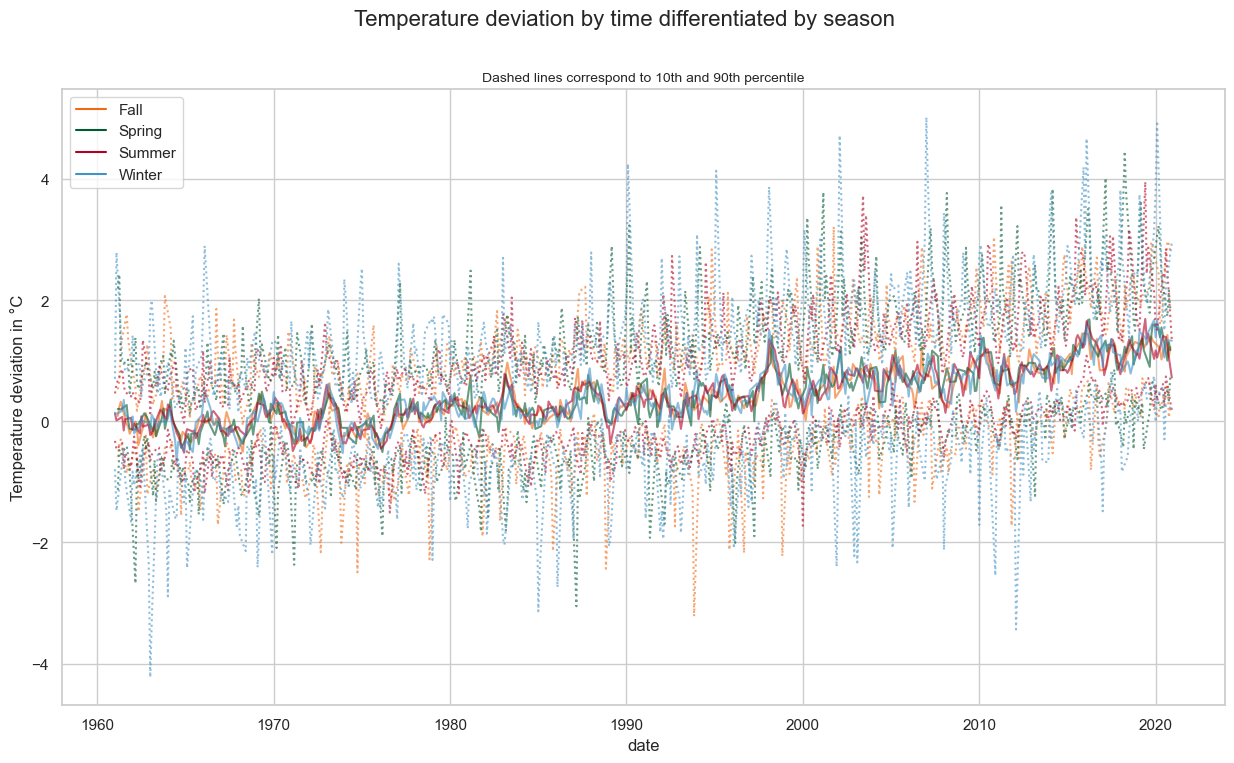

In [140]:
plt.figure(figsize=(15,8))
sns.set_style("whitegrid")
cpal = ['#f16913','#005a32', '#b10026', '#4292c6']
# get average values
sub_df = sub_tmp_df.groupby(["season", "date"]).agg({"Value":"median"}).reset_index()

ax = sns.lineplot(data = sub_df, y = "Value", x = "date",hue = "season",palette = cpal, alpha = 0.6);

# Plot the more extreme quantiles
sub_df_quant = sub_tmp_df.groupby(["season", "date"])['Value'].agg([
    ('10th_percentile', lambda x: x.quantile(0.1)),
    ('90th_percentile', lambda x: x.quantile(0.9))]).reset_index() 
sns.lineplot(data = sub_df_quant, y = '90th_percentile', x = "date",hue = "season", 
             palette = cpal, linestyle="dotted", alpha = 0.6,  ax = ax);

sns.lineplot(data = sub_df_quant, y = '10th_percentile', x = "date",hue = "season", 
             palette = cpal, linestyle="dotted", alpha = 0.6,  ax = ax);
plt.title("Dashed lines correspond to 10th and 90th percentile", fontsize = 10)
plt.suptitle("Temperature deviation by time differentiated by season",fontsize = 16)
plt.ylabel("Temperature deviation in °C")
# fix legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[0:4], labels[0:4]);

While on average temperatures rise across the board, looking at the 10th and 90th quantile values, we see that extreme temperatures (above and below) appear to be more common in winter as compared to summer for example. However, the pattern does not seem to be very strong - rather an anecdote.

### CO2 Analysis

Next, we look at the CO2 data. First, load the data:

In [155]:
CO2_df = pd.read_csv(filepath_or_buffer ="D:\Data\Dropbox\LifeAfter\Datascientest\Climate\Data\CO2_data\owid-co2-data.csv")
CO2_df['year'] =pd.to_datetime(CO2_df.year, format = '%Y')
CO2_df.info()

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\juliu\AppData\Local\Temp\ipykernel_26364\956398093.py:1: SyntaxWarning: invalid escape sequence '\D'
  CO2_df = pd.read_csv(filepath_or_buffer ="D:\Data\Dropbox\LifeAfter\Datascientest\Climate\Data\CO2_data\owid-co2-data.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47415 entries, 0 to 47414
Data columns (total 79 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   country                                    47415 non-null  object        
 1   year                                       47415 non-null  datetime64[ns]
 2   iso_code                                   39548 non-null  object        
 3   population                                 39414 non-null  float64       
 4   gdp                                        14495 non-null  float64       
 5   cement_co2                                 23764 non-null  float64       
 6   cement_co2_per_capita                      22017 non-null  float64       
 7   co2                                        30308 non-null  float64       
 8   co2_growth_abs                             28157 non-null  float64       
 9   co2_growth_prct  

First, we are interested in getting a data frame with the average per year in terms of CO2, temperature, Methane, primary_energy_consumption, nitrous_oxide, total_ghg:

D:\Programs\Miniconda\envs\climate\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Programs\Miniconda\envs\climate\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Programs\Miniconda\envs\climate\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Programs\Miniconda\envs\climate\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

Text(0, 0.5, 'Emission in Million tonnes')

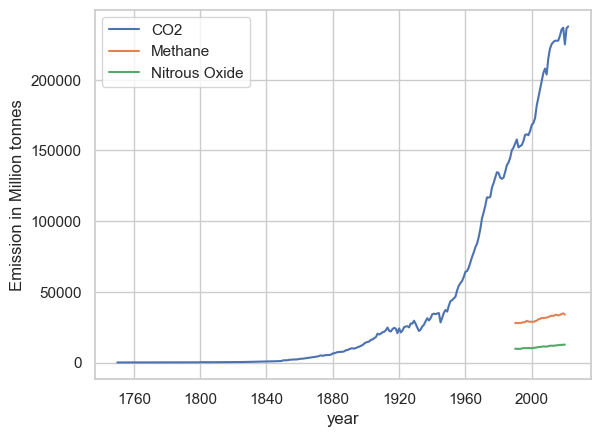

In [263]:
CO2_df_sum = CO2_df.groupby('year').agg({'co2':'sum',
                                        'methane':'sum',
                                        'primary_energy_consumption':'sum',
                                        'nitrous_oxide':'sum',
                                        'total_ghg':'sum'}).reset_index()
CO2_df_sum.tail(10)
CO2_df_sum[['co2', 'methane', 'primary_energy_consumption', 'nitrous_oxide']] = CO2_df_sum[['co2', 'methane', 'primary_energy_consumption', 'nitrous_oxide']].replace({0:np.nan})
sns.lineplot(data = CO2_df_sum, x = "year", y = "co2", label = "CO2")
sns.lineplot(data = CO2_df_sum, x = "year", y = "methane", label = "Methane")
sns.lineplot(data = CO2_df_sum, x = "year", y = "nitrous_oxide", label = "Nitrous Oxide")
plt.legend()
plt.ylabel("Emission in Million tonnes")

Next we plot the Kyoto protocol reference year 1990 and the development of CO2, representative for Europe, the US, BRICS, Japan and Australia.

D:\Programs\Miniconda\envs\climate\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Programs\Miniconda\envs\climate\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Programs\Miniconda\envs\climate\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
D:\Programs\Miniconda\envs\climate\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 l

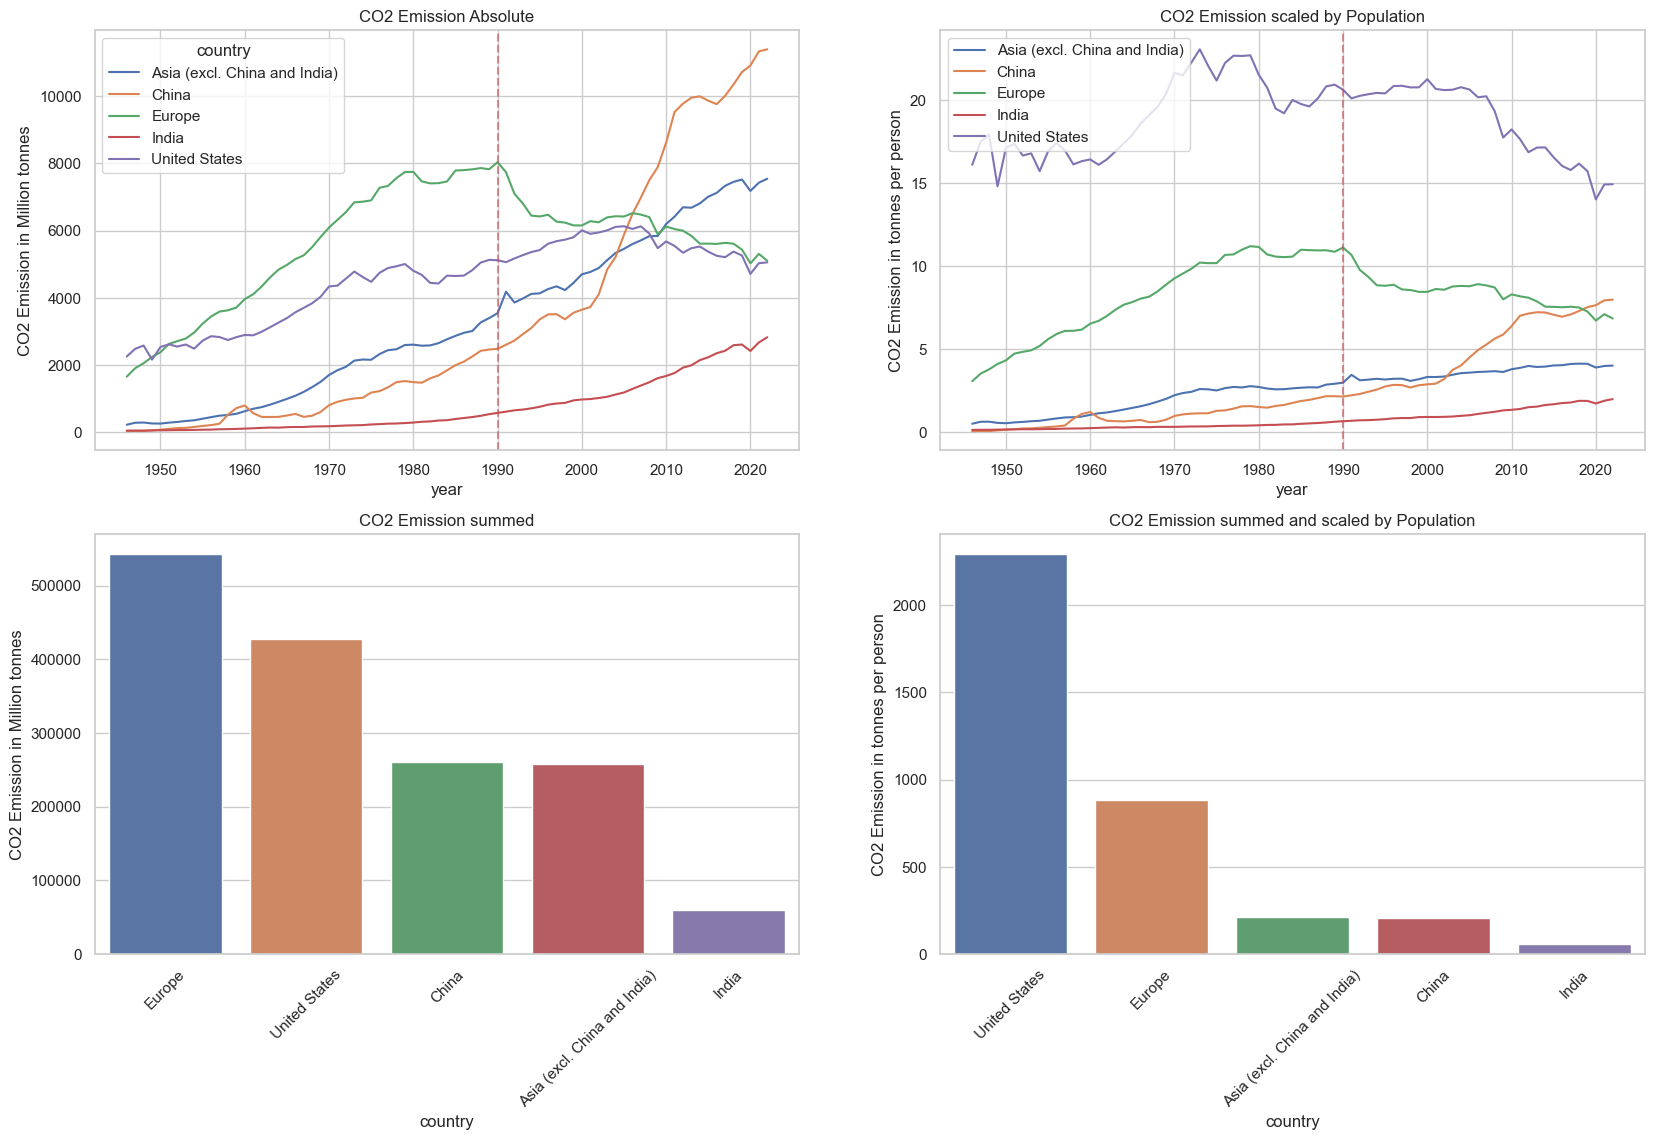

In [211]:
sub_CO2 = CO2_df.loc[(CO2_df['country']=='Asia (excl. China and India') | (CO2_df['country']=='India') | 
(CO2_df['country']=='China') | (CO2_df['country']=='China') | (CO2_df['country']=='Europe')| (CO2_df['country']=='United States')
| (CO2_df['country']=='Asia (excl. China and India)')]

event_time = pd.to_datetime('1990-01-01')  # Kyoto protocol reference level
plt.figure(figsize = (20,12))
plt.subplot(221)
sns.lineplot(data = sub_CO2.loc[sub_CO2['year'].dt.year > 1945], x = "year", y = "co2", hue = "country")
plt.ylabel("CO2 Emission in Million tonnes")
plt.title("CO2 Emission Absolute")
plt.axvline(x=event_time, color='r', linestyle='--', alpha = 0.6)

plt.subplot(222)
sns.lineplot(data = sub_CO2.loc[sub_CO2['year'].dt.year > 1945], x = "year", y = "co2_per_capita", hue = "country")
plt.ylabel("CO2 Emission in tonnes per person")
plt.title("CO2 Emission scaled by Population")
plt.legend(loc = "upper left")
plt.axvline(x=event_time, color='r', linestyle='--', alpha = 0.6)

# next plot the summed emmission
sum_df = sub_CO2.groupby("country").agg({"co2":"sum", "co2_per_capita":"sum"}).reset_index()
plt.subplot(223)
sns.barplot(data = sum_df.sort_values("co2", ascending=False), x="country", y="co2")
plt.ylabel("CO2 Emission in Million tonnes")
plt.title("CO2 Emission summed")
plt.xticks(rotation=45)
plt.subplot(224)
sns.barplot(data = sum_df.sort_values("co2_per_capita", ascending=False), x="country", y ="co2_per_capita")
plt.ylabel("CO2 Emission in tonnes per person")
plt.title("CO2 Emission summed and scaled by Population")
plt.xticks(rotation=45);

### Correlation Temperature deviance and other variables

For this, we load the NASA data global temperature deviance and join it with the aggregated CO2 data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Year    145 non-null    datetime64[ns]
 1   J-D     145 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 2.4+ KB


D:\Programs\Miniconda\envs\climate\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Programs\Miniconda\envs\climate\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Programs\Miniconda\envs\climate\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Programs\Miniconda\envs\climate\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

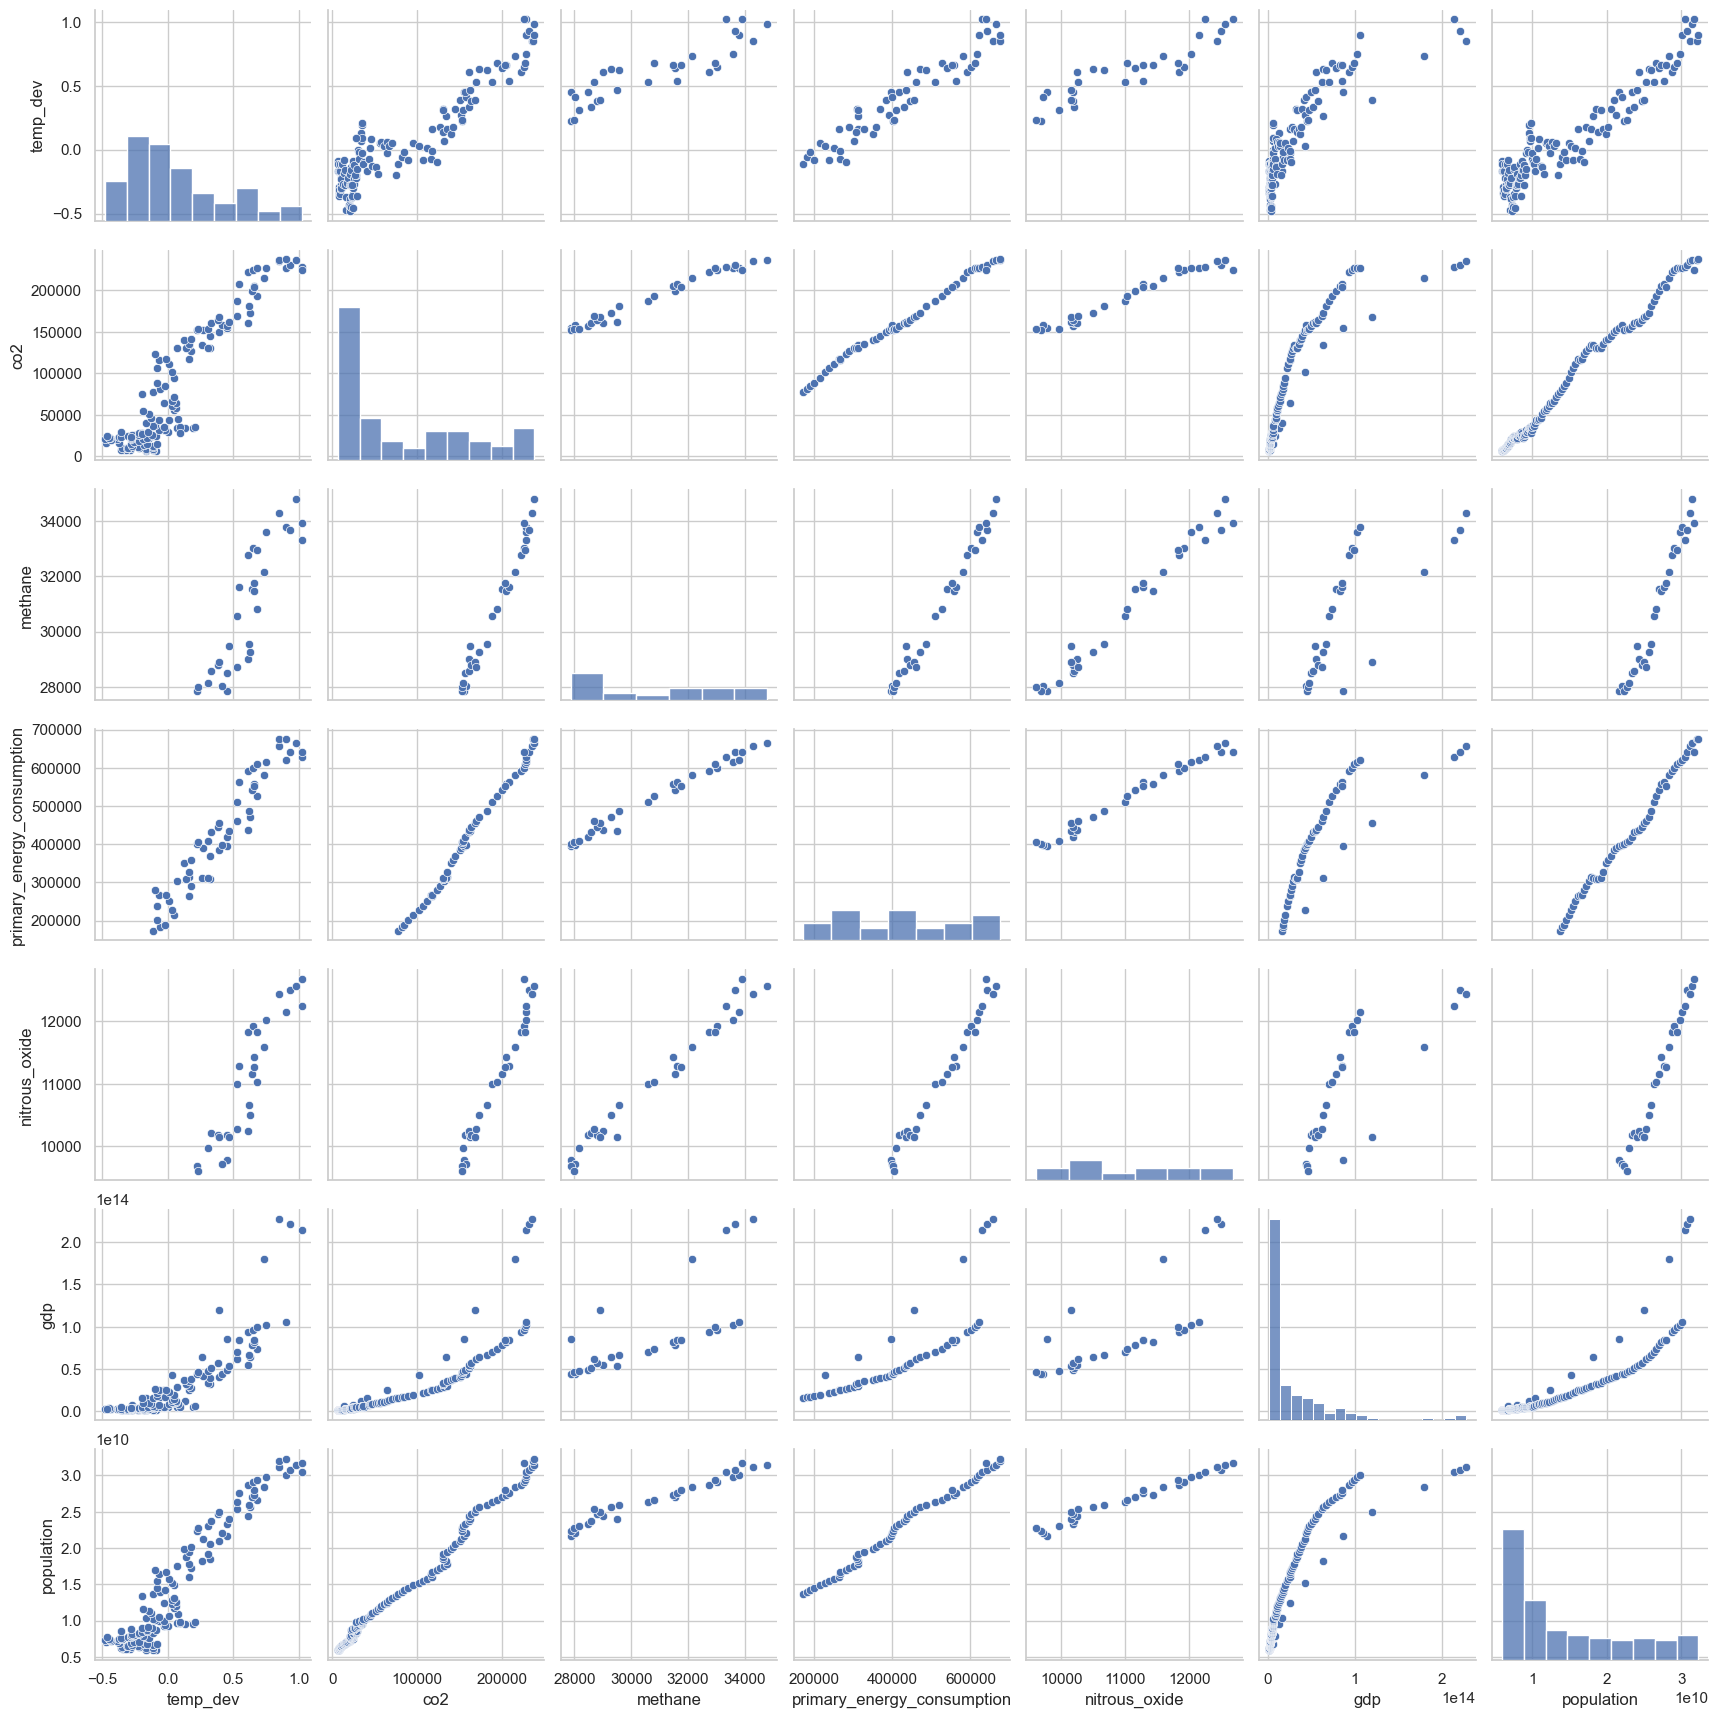

In [266]:
NASA_df = pd.read_csv(filepath_or_buffer = r"D:\Data\Dropbox\LifeAfter\Datascientest\Climate\Data\NASA\GLB.Ts+dSST.csv",skiprows = 1)
NASA_df = NASA_df[['Year', 'J-D']]
NASA_df['Year'] = pd.to_datetime(NASA_df['Year'], format = "%Y")
NASA_df.info()
# filter our summarized CO2 data by including only years that are included in the NASA data and vice versa

NASA_df['Year'].min()
Temp_CO2 = CO2_df_sum.loc[CO2_df_sum['year'] >= NASA_df['Year'].min()]

Temp_CO2 = CO2_df.groupby('year').agg({'co2':'sum',
                                        'methane':'sum',
                                        'primary_energy_consumption':'sum',
                                        'nitrous_oxide':'sum',
                                        'total_ghg':'sum',
                                        'gdp':'sum',
                                        'population':'sum'}).reset_index()

# Merge data sets
Temp_CO2 = Temp_CO2.merge(NASA_df, left_on = "year", right_on = 'Year')
# Rename J-D to to temp_dev
Temp_CO2 = Temp_CO2.rename(columns={"J-D":"temp_dev"})
Temp_CO2["temp_dev"] = Temp_CO2["temp_dev"].astype("float64")

# replace all zeros with NAs
Temp_CO2[['co2', 'methane', 'primary_energy_consumption', 'nitrous_oxide', 'gdp', 'population']] = Temp_CO2[['co2', 'methane', 'primary_energy_consumption', 'nitrous_oxide', 'gdp', 'population']].replace({0:np.nan})
# Plot
sns.pairplot(Temp_CO2[["temp_dev", 'co2', 'methane', 'primary_energy_consumption', 'nitrous_oxide', 'gdp', 'population']])


Now quantify that with a correlational plot (note, we use spearman, as the joint probability does not look fully normal in all cases):

In [276]:
# calculate th correlational matrix
corr = Temp_CO2[["temp_dev", 'co2', 'methane', 'primary_energy_consumption', 'nitrous_oxide', 'gdp', 'population']].corr(method = "spearman")

corr.style.background_gradient(cmap='coolwarm', axis=None, vmin=0.7, vmax=1)